In [1]:
from torch import no_grad
from PIL import Image

from vulture import CompleteUpsampler
from vulture.utils import vis

In [2]:
path = "example_data/rome.jpg"
img = Image.open(path).convert("RGB")

UP_PATH, DENOISE_PATH, AUTOENC_PATH = "../trained_models/lu_reg_ac48.pth", "../trained_models/dvt.pth", "../trained_models/dac_dv2_denoised_e500.pth"
upsampler = CompleteUpsampler("LOFTUP_COMPRESSED", UP_PATH, DENOISE_PATH, AUTOENC_PATH, device="cuda:0", to_half=True, to_eval=True)

In [3]:
with no_grad():
    lr_feats_for_vis = upsampler.get_lr_feats(img)
    hr_feats = upsampler.forward(img)

torch.Size([1, 48, 61, 82]) -> torch.Size([1, 48, 864, 1152])


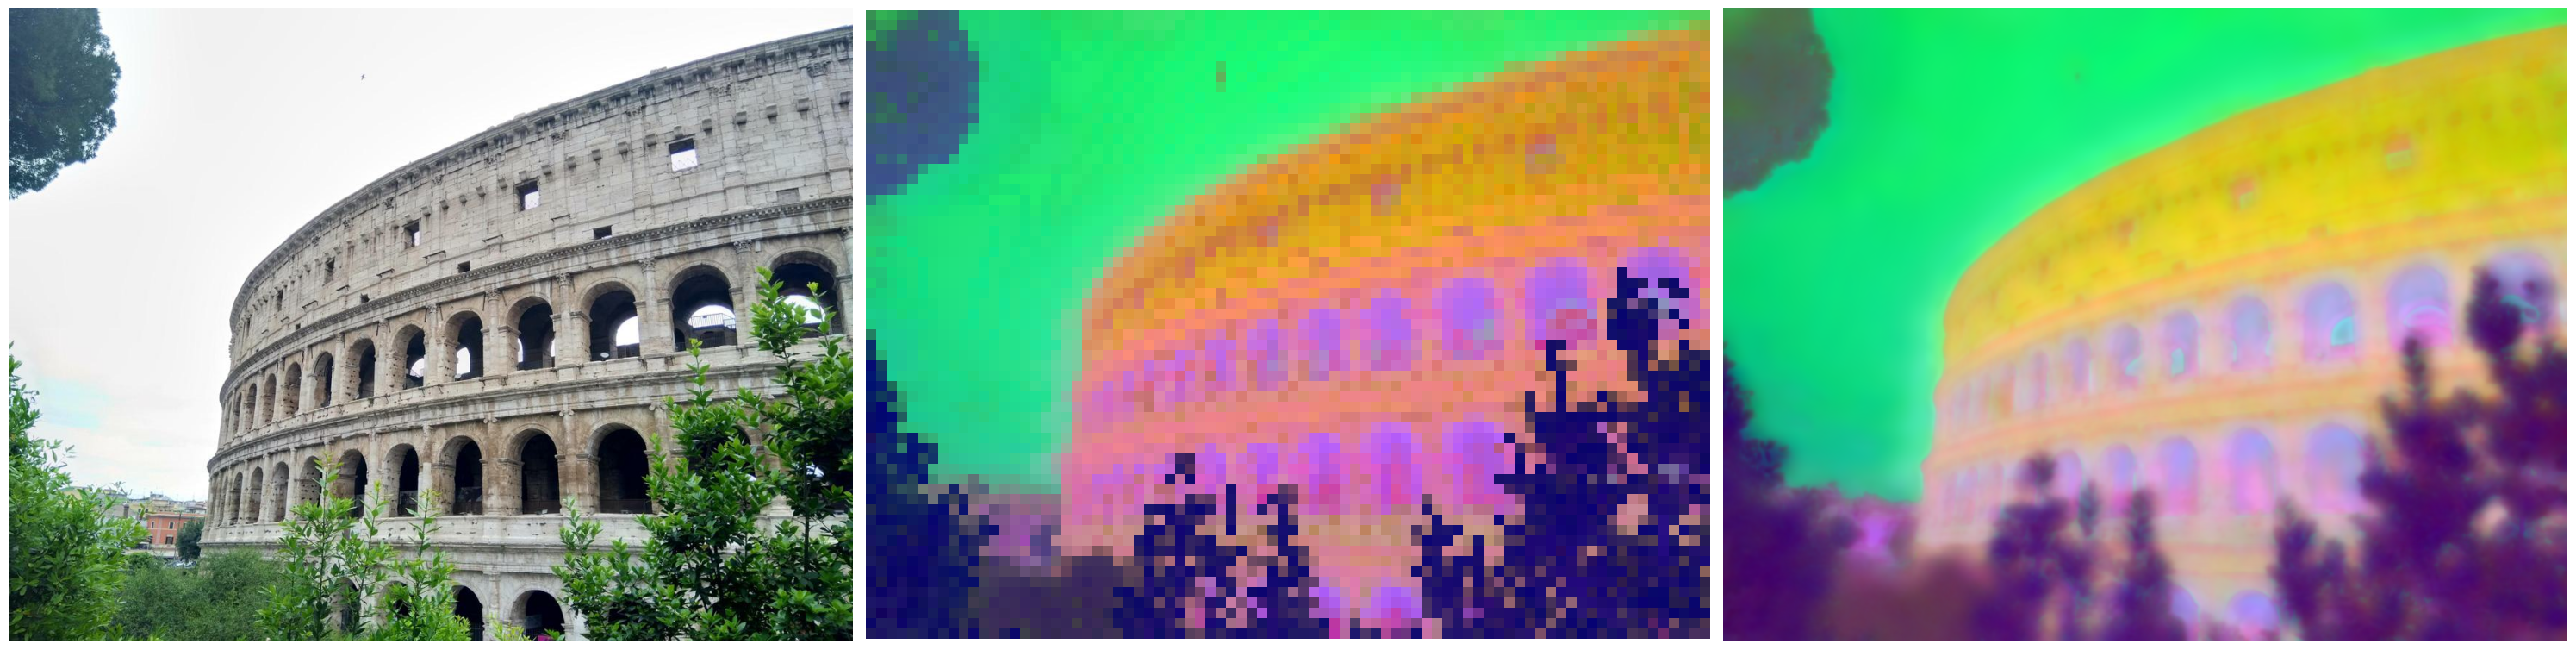

In [4]:
print(f"{lr_feats_for_vis.shape} -> {hr_feats.shape}")
vis(None, img, lr_feats_for_vis, hr_feats, None, True)